20BRS1075 Aman Gupta


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [ ]:
data=pd.read_table("/content/fruit_data_complete (1).txt")

In [ ]:
data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [ ]:
lookup=dict(zip(data.fruit_label.unique(), data.fruit_name.unique()))
lookup

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [ ]:
X=data.iloc[:,3:6]
y=data.fruit_label


In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3)

In [ ]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)


In [ ]:
knn.score(xtest,ytest)

0.6111111111111112

In [ ]:
conmat=confusion_matrix(ytest,ypred)
conmat

array([[3, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 3, 3],
       [2, 0, 1, 4]])

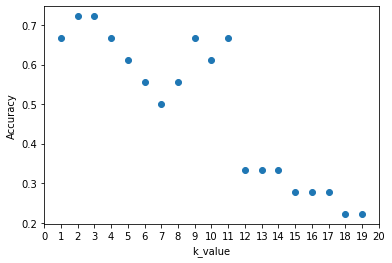

In [ ]:
k_range = range(1,20)
scores = []
for k in k_range:
 knn = KNeighborsClassifier(n_neighbors = k)
 knn.fit(xtrain, ytrain)
 scores.append(knn.score(xtest, ytest))
plt.figure()
plt.xlabel('k_value')
plt.ylabel('Accuracy')
plt.scatter(k_range, scores)
plt.xticks(range(0,21));

Text(0, 0.5, 'Accuracy')

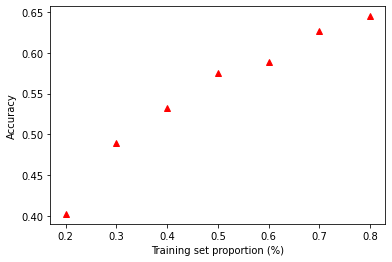

In [ ]:
t = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
knn = KNeighborsClassifier(n_neighbors = 3)
plt.figure()
for split in t:
  scores = []
  for i in range(1,100):
    xtrain, xtest, ytrain, ytest = train_test_split(X, y, train_size = split)
    knn.fit(xtrain, ytrain)
    scores.append(knn.score(xtest, ytest))
  plt.plot(split, np.mean(scores), 'r^')
plt.xlabel('Training set proportion (%)')
plt.ylabel('Accuracy')

In [ ]:
traindata=pd.read_csv("/content/train_data (1).csv")
testdata=pd.read_csv("/content/test_data.csv")

In [ ]:
traindata.head()

,loan_id,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default
0,1,27,1.0,Aadhar,504264,820920,2,2,0,0
1,2,48,1.0,Aadhar,728556,831444,6,2,0,0
2,3,30,2.0,VoterID,642936,826092,0,0,0,1
3,4,28,1.0,Aadhar,746556,930924,0,0,0,0
4,5,29,1.0,Aadhar,1139880,1902000,0,0,0,0


In [ ]:
testdata.head()

,loan_id,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none
0,7001,29,1.0,Aadhar,636936,768240,2,2,0
1,7002,28,1.0,Aadhar,548988,693060,3,3,0
2,7003,28,1.0,Aadhar,651756,936600,0,0,0
3,7004,45,2.0,Aadhar,614676,744840,4,3,0
4,7005,48,1.0,Aadhar,625236,839400,0,0,0


In [ ]:
le = preprocessing.LabelEncoder()
xtrain=traindata.iloc[:,:-1]
xtrain=xtrain.drop("loan_id",axis=1)
xtrain.proof_submitted=le.fit_transform(xtrain.proof_submitted)
ytrain=traindata.loan_default
xtest=testdata
xtest.proof_submitted=le.fit_transform(xtest.proof_submitted)
xtest=xtest.drop("loan_id",axis=1)


,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none
0,29,1.0,0,636936,768240,2,2,0
1,28,1.0,0,548988,693060,3,3,0
2,28,1.0,0,651756,936600,0,0,0
3,45,2.0,0,614676,744840,4,3,0
4,48,1.0,0,625236,839400,0,0,0
...,...,...,...,...,...,...,...,...
2995,30,2.0,0,353808,823656,0,0,0
2996,32,2.0,0,767364,919380,4,2,0
2997,43,1.0,0,639456,773088,2,2,0
2998,32,2.0,0,687108,907728,0,0,0


In [ ]:
xtrain['education'].fillna(0, inplace = True)
xtest['education'].fillna(0, inplace = True)

In [ ]:
xtrain.education.unique()

array([1., 2., 0.])

In [ ]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)
ypred

array([0, 0, 0, ..., 0, 1, 1])